### Multiple Linear Regression 
In this notebook, I created a few simple linear regression models, as well as a multiple linear regression model, to predict home value.
#### How Do We Find the "Right" Coefficients in Multiple Linear Regression
In the simple linear regression section, you saw how we were interested in minimizing the squared distance between each actual data point and the predicted value from our model.

But in multiple linear regression, we are actually looking at points that live in not just a two dimensional space.

For a full derivation of how this works, this article provides a break down of the steps.

The takeaway for us is that we can find the optimal β estimates by calculating ((X'X)^(-1))X'Y

In the following video, you will use statsmodels to obtain the coefficients similar to in the last concept, but you will also solve for the coefficients using the equation above to show the results are not magic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ggplot import *
import seaborn as sb

%matplotlib inline

c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
df = pd.read_csv('data/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [3]:
df['intercept'] = 1
r_model = sm.OLS(df['price'], df[['intercept','bathrooms','bedrooms','area']])
result = r_model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:51:19   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.3

### Dummy Variables
You saw in the earlier notebook that you weren't able to directly add a categorical variable to your multiple linear regression model. In this notebook, you will get some practice adding dummy variables to your models and interpreting the output.

In [4]:
df[['lodge','ranch','victorian']] = pd.get_dummies(df['style'])
df[['A','B','C']] = pd.get_dummies(df['neighborhood'])

df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,lodge,ranch,victorian,A,B,C
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,0,1,0,1,0
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,1,0,1,0,0
4,5108,B,2208,6,4,victorian,1101539,1,0,0,1,0,1,0


In [5]:
r_model = sm.OLS(df['price'], df[['intercept','lodge','ranch']])
result = r_model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:51:19   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.046e+06   7775.607    134.534      0.0

In [13]:
df['intercept'] = 1
r_model = sm.OLS(df['price'], df[['intercept','B','C']])
result = r_model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Tue, 27 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:15:52   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.0

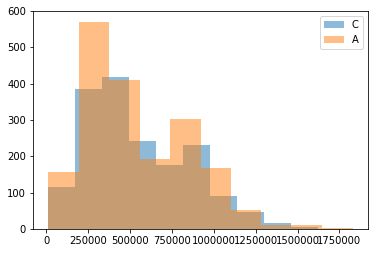

In [15]:
plt.hist(df.query("C == 1")['price'], alpha = 0.5, label = 'C');
plt.hist(df.query("A == 1")['price'], alpha = 0.5, label = 'A');

plt.legend();

In [33]:
r_model = sm.OLS(df['price'], df[['intercept','B','C', 'lodge', 'victorian', 'area','bedrooms','bathrooms']])
result = r_model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     9801.
Date:                Tue, 27 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:14:21   Log-Likelihood:                -80346.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6020   BIC:                         1.608e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.105e+05   8015.058    -26.264      0.0

### Analsing MultiColinearity

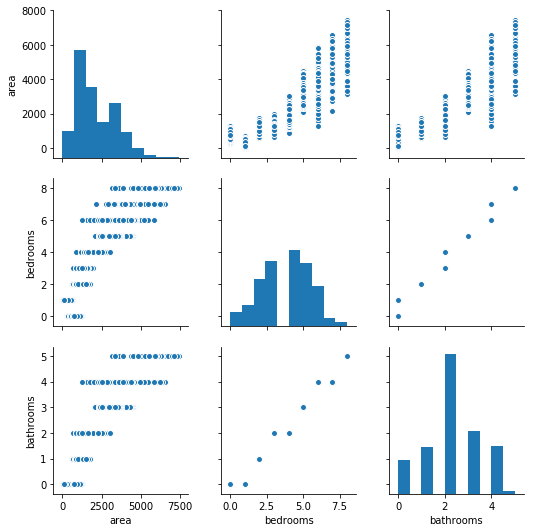

In [19]:
sb.pairplot(df[['area','bedrooms','bathrooms']]);

1.Use seaborn to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset by running the cell below. You might also try adding color (hue) for the house style or neighborhood. 


Bathroom and bedrooms variable are highly correlated with each other and aslo have strong relationship with the 'area' variable. But this is not conceded in the result of Multi-regression model of these variable combined together. Coefficient of bathroom come out to be negaitive while that of bedrooms as positive. 

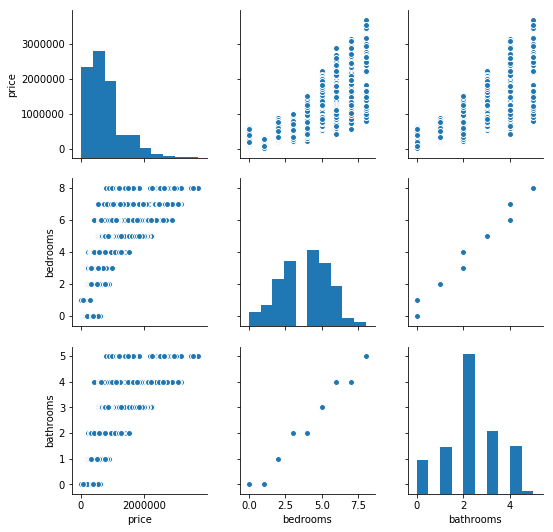

In [20]:
sb.pairplot(df[['price', 'bedrooms', 'bathrooms']])

It can be seen that bathroom is positiviely correlated to the price, but un the model the coefficient comes out to be negative which leads to the conclusion that, in such cases , the predicted models comes to be inaccurate.

In [27]:
lm = sm.OLS(df['price'], df[['intercept','bathrooms','bedrooms','area']])
result = lm.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Tue, 27 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:07:39   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.3

### VIFs

In [21]:
# Calculate the VIFs for each variable in your model.
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [28]:
# get y and X dataframes based on this regression:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type='dataframe')

In [29]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [30]:
vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


In [31]:
# ON removing one varaible, with least importance : Bathrooms
y, X = dmatrices('price ~ area + bedrooms', df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


##### Hence VIFs fall below 10, now we can go with the prediction model that excluded the variable 'bathrooms'

In [32]:
r_model = sm.OLS(df['price'], df[['intercept','B','C', 'lodge', 'victorian', 'area','bedrooms']])
result = r_model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.144e+04
Date:                Tue, 27 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:13:26   Log-Likelihood:                -80346.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6021   BIC:                         1.608e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.096e+05   7842.001    -26.727      0.0

### Interpreting Coeffcients

#### Model 1
predict price using neighborhood, style, and the area of the home.

In [34]:
r_model = sm.OLS(df['price'], df[['intercept','area','lodge','ranch','A','B']])
result = r_model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Tue, 27 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:30:01   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.046e+05   7699.704    -26.569      0.0